# Car price predictor

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Now we should look at some features of our data which is not in the language which can be understood by our model

In [4]:
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())
print(df['Fuel_Type'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']


We should  check missing values in our data 

In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

As feature name 'Car name'is not required in our data....as it doesn't helps our model to predict labels,so we should drop this feature of our data. 

In [7]:
final_dataset=df[[ 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

Making a column name 'current year' which shows the present year.
As 'Year'column is not suitable for our model we created 'no_years'feature which shows that how many older the model of car is.

In [8]:
final_dataset['current year']=2020

In [9]:
final_dataset['no_years']=final_dataset['current year']-final_dataset['Year']

In [10]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current year,no_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


Drop the useless columns out of our data and keep our data clean.

In [11]:
final_dataset.drop(['Year','current year'],axis=1,inplace=True)

In [12]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


Now we will use pd.get_dummies which helps us in one hot encoding,as some features you can see are categorical.

In [13]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [14]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


Visualizing our data correlation with the help of seaborn.

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

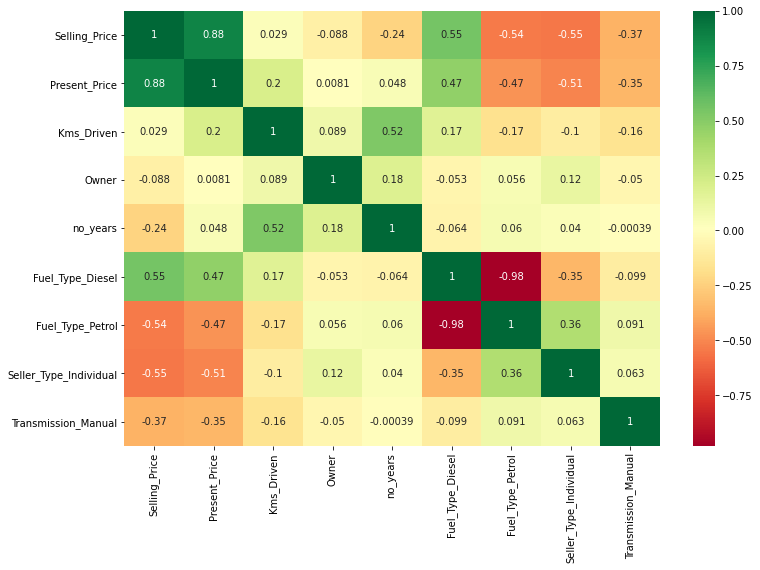

In [16]:
a=final_dataset.corr()
plt.figure(figsize=(12,8))
sns.heatmap(a,annot=True,cmap='RdYlGn')

In [17]:
x=final_dataset.drop('Selling_Price',axis=1)
y=final_dataset['Selling_Price']

If we want to know about most important features in the data then it can be done by ExtraTreesRegressor.

In [18]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [19]:
print(model.feature_importances_)

[0.3630901  0.0413981  0.00134382 0.07680175 0.2403085  0.00872674
 0.13214953 0.13618145]


Plotting the most important features

<AxesSubplot:>

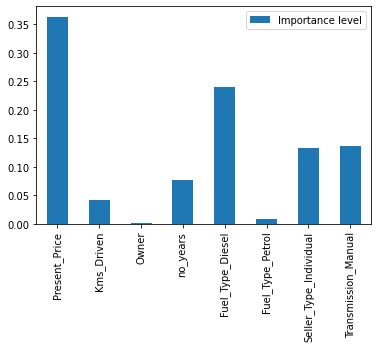

In [20]:
feat_imp=pd.DataFrame(model.feature_importances_,x.columns)
feat_imp.columns =['Importance level']
feat_imp.plot(kind='bar')

In [21]:
feat_imp.head()

,Importance level
Present_Price,0.363090
Kms_Driven,0.041398
Owner,0.001344
no_years,0.076802
Fuel_Type_Diesel,0.240309


Train_test_split our data.

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=101)

Selecting our model....In this project i did selected RandomForestRegressor.

In [23]:
from sklearn.ensemble import RandomForestRegressor


Tuning hyperparameters.

In [24]:
##hyperparameters
import numpy as np
n_estimators=[int(a) for a in np.linspace(start=100,stop=1200,num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [25]:
#number of features to consider at every split
max_features=['auto','sqrt']
#max number of levels in tree
max_depth=[int(a)for a in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [26]:
from sklearn.model_selection import RandomizedSearchCV

In [27]:
#random grid
random_grid= {'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [28]:
rf=RandomForestRegressor()

In [29]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [30]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

Now we should check which parameters were best for our model,given by RandomSearchCv

In [31]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=15, min_samples_leaf=5, min_samples_split=5,
                      n_estimators=400)

Prediction.

In [32]:
predictions=rf_random.predict(x_test)

In [33]:
predictions

array([ 0.47255123,  6.2515185 ,  7.37351808,  7.51302314,  0.28517483,
        4.92867003,  5.44035652,  7.19742595,  0.57211934,  7.80151051,
        5.25797279,  1.12650433,  0.23796062,  3.59413793, 10.96053633,
        4.09990573,  4.11148622,  0.60774808,  3.67622948, 10.82480108,
        4.94583502,  2.68949138,  7.19742595,  7.94239931,  0.520707  ,
        5.98172089,  0.37950589,  4.25791036,  5.68212608,  5.11698386,
        3.30257164,  8.14977168,  0.67813772, 11.01691038,  4.6850555 ,
        0.60094558,  3.59199924,  0.2420081 ,  4.98459498,  3.23926993,
        0.73498518,  5.1053026 ,  7.41782833, 16.97358444,  0.60772855,
        4.63723952,  0.27847132, 10.54129801,  4.07925055, 10.19435467,
        4.12898447,  1.33516136,  5.74036067,  0.41477862,  5.68212608,
        4.58263842,  0.38442634,  0.35525095,  5.59528277, 10.4240227 ,
        0.27847132,  7.29875978,  0.4379174 ,  7.23458604,  6.27630905,
        5.42680733, 14.21098935,  0.37674103,  4.12015321,  6.21

c:\users\om22r\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

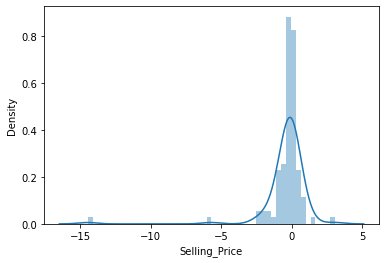

In [34]:
sns.distplot(y_test-predictions)

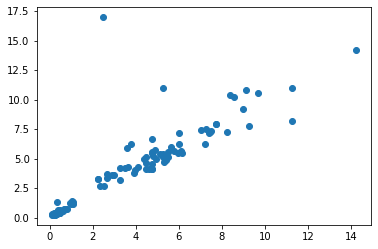

In [35]:
plt.scatter(y_test,predictions)

As we can see from the above graphs that our model is successfully built and predicting well !!

Our model is built and now we can export it as a pickle file and by using flask or other framework , we can deploy our model.

In [36]:
import pickle
file=open('random_forest_regression_model.pkl','wb')
pickle.dump(rf_random,file)